In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cosine

def cosine_sim(vec1, vec2):
    return 1 - cosine(vec1, vec2)

In [2]:
# Read in vectors
all_vectors = pd.read_csv('vector_estimates.csv')
all_vectors

,drug,vector_method,num_neighbours,0,1,2,3,4,5,6,...,246,247,248,249,250,251,252,253,254,255
0,CID000003954,actual embedding,NaN,-0.089644,0.070215,0.039417,-0.420712,-0.022252,0.476755,0.095462,...,0.007259,-0.029141,-0.259377,0.267026,0.108330,0.122337,-0.049086,-0.055377,-1.350930,0.040946
1,CID000003954,Generalised inverse,150.0,0.276522,0.006859,-0.030098,-0.408090,-0.096648,0.244188,0.101437,...,-0.019434,-0.293502,0.353921,-0.357333,0.065818,0.132488,0.076210,-0.199647,-0.292554,-0.164859
2,CID000003954,Least squares,150.0,0.276522,0.006859,-0.030098,-0.408091,-0.096648,0.244188,0.101437,...,-0.019434,-0.293502,0.353921,-0.357332,0.065818,0.132488,0.076210,-0.199647,-0.292554,-0.164859
3,CID000003954,1st eigenvec,150.0,-0.018377,0.005799,-0.051114,-0.003759,-0.067734,0.014416,-0.015630,...,-0.015879,0.000587,-0.013302,0.006057,0.014538,-0.012574,0.015263,0.013000,-0.103786,-0.056465
4,CID000003954,mean columns,150.0,0.294525,0.052961,0.289781,-0.051251,0.621494,0.452084,-0.048916,...,0.130208,-0.078158,-0.393616,0.217934,0.459973,-0.093525,0.018807,0.210357,-0.398718,0.191412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,CID000004497,weighted frechet mean,25.0,0.026980,0.015540,0.055775,-0.018328,0.017213,0.051512,0.007899,...,0.049177,-0.033824,-0.078832,0.057990,0.097627,-0.012653,-0.007135,0.052541,-0.085095,0.065954
2453,CID000004913,actual embedding,NaN,0.119468,0.090035,0.880989,-0.130732,0.023596,0.945386,-0.103599,...,1.233768,-0.208746,0.413446,0.344618,0.724254,-0.101604,-0.073505,1.122628,-0.385169,0.887730
2454,CID000004913,median columns,54.0,0.162367,0.088031,0.223808,-0.008218,0.156579,0.351214,-0.013465,...,0.060249,0.005583,-0.227941,0.182831,0.459823,-0.116390,0.008326,0.315748,-0.253820,0.012230
2455,CID000004913,frechet mean,54.0,0.058906,0.023454,0.053027,-0.000473,0.060668,0.096721,-0.005000,...,0.028913,-0.003415,-0.041695,0.053580,0.113714,-0.014605,0.017485,0.064225,-0.105064,0.021717


In [12]:
results = []
component_cols = [str(i) for i in range(256)]
actual_embeds = all_vectors.query('vector_method == "actual embedding"')
for method, subdf in all_vectors.groupby('vector_method'):
    if method != 'actual embedding':
        for i, row in subdf.iterrows():
            drug = row.drug
            vec1 = list(row[component_cols])
            vec2 = list(actual_embeds.query('drug == @drug').iloc[0][component_cols])
            sim = cosine_sim(vec1, vec2)
            results.append([drug, method, sim])

results = pd.DataFrame(results, columns=['drug', 'vector_method', 'cosine_sim_to_actual'])
results

,drug,vector_method,cosine_sim_to_actual
0,CID000003954,1st eigenvec,-0.015246
1,CID000004829,1st eigenvec,-0.143292
2,CID000004140,1st eigenvec,-0.158457
3,CID000003676,1st eigenvec,0.273259
4,CID000003339,1st eigenvec,-0.199809
...,...,...,...
1906,CID000005530,weighted frechet mean,0.619878
1907,CID000039860,weighted frechet mean,0.488481
1908,CID000005482,weighted frechet mean,0.252063
1909,CID000004497,weighted frechet mean,0.628280


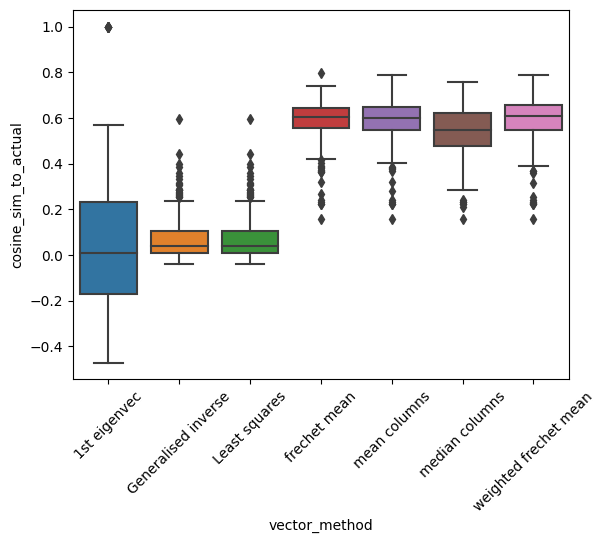

In [16]:
sns.boxplot(results, x='vector_method', y='cosine_sim_to_actual')
plt.xticks(rotation=45)
plt.show()